# Exploratory Data Analysis
Wow. Looks like I'm back to Python. Let's do this boiz.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
sns.set(style="white", context="talk")

In [2]:
contra = pd.read_csv('../../1-data/contraceptive_for_students.csv')

Our dataset, made available by the <a href='https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice'>UCI Machine Learning Repository</a>, is a subset of the 1987 National Indonesian contraceptive survey. Women who were married who were not pregnant were interviewed about whether they used birth control contraceptive methods. The original `contraceptive` covariate has three possible values. A `1` indicates that no contraceptive was used, a `2` indicates the use of a long-term contraceptive method, and a `3` indicates a preference for a short-term contraceptive. To make `contraceptive` variable ordinal, we will be switched such that `0` will indicate no contraceptive, `1` will indicate a short-term contraceptive preference, and `2` will indicate a long-term preference.

In [3]:
this_dic = {1:0, 3:1, 2:2}
contra['contraceptive'] = contra['contraceptive'].map(this_dic)

In [4]:
contra.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,0
1,45,1,3,10,1,1,3,4,0,0
2,43,2,3,7,1,1,3,4,0,0
3,42,3,2,9,1,1,3,3,0,0
4,36,3,3,8,1,1,3,2,0,0


## Data Dictionary
The following is the data dictionary provided by the UCI Machine Learning Repository.

1. Wife's age (numerical)
2. Wife's education (categorical) 1=low, 2, 3, 4=high
3. Husband's education (categorical) 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0=Non-Islam, 1=Islam
6. Wife's now working? (binary) 0=Yes, 1=No
7. Husband's occupation (categorical) 1, 2, 3, 4
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
9. Media exposure (binary) 0=Good, 1=Not good
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

# Summary Statistics

## Counts
Most of the women do not have contraceptive.

In [5]:
contra.groupby('contraceptive').contraceptive.count()

contraceptive
0    629
1    511
2    333
Name: contraceptive, dtype: int64

I am using a color scheme by <a href='https://www.instagram.com/colours.cafe/'>Colours Cafe</a>. Here is the distribution of the data.

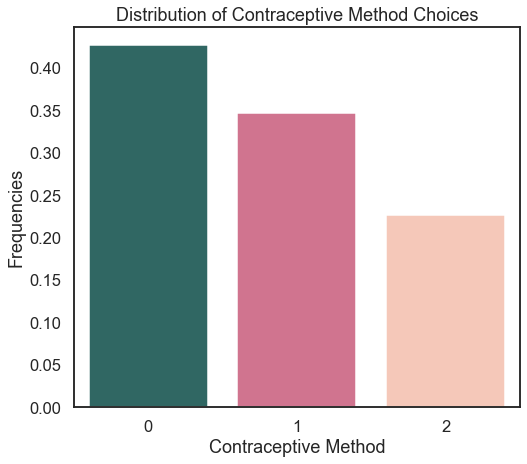

In [6]:
plt.figure(figsize=(8,7))
ax = sns.barplot(x=contra.groupby('contraceptive').contraceptive.count().index,
                 y=contra.groupby('contraceptive').contraceptive.count() / contra.shape[0],
                 palette=['#27706B', '#DF6589', '#FFC3AF'])
ax.set(ylabel='Frequencies',
       xlabel='Contraceptive Method',
       title='Distribution of Contraceptive Method Choices');

This plot is expected. Indonesia is a Muslim country.

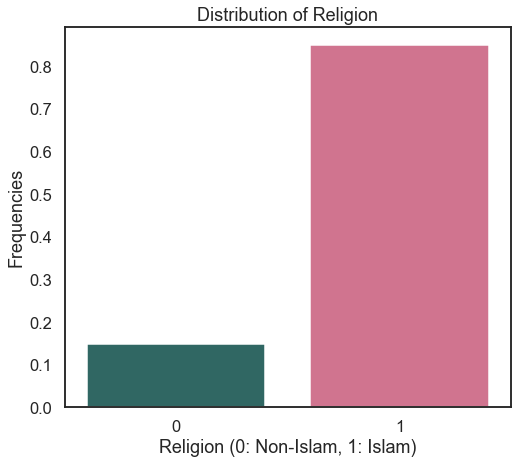

In [7]:
plt.figure(figsize=(8,7))
ax = sns.barplot(x=contra.groupby('wife_religion').contraceptive.count().index,
                 y=contra.groupby('wife_religion').contraceptive.count() / contra.shape[0],
                 palette=['#27706B', '#DF6589', '#FFC3AF'])
ax.set(ylabel='Frequencies',
       xlabel='Religion (0: Non-Islam, 1: Islam)',
       title='Distribution of Religion');

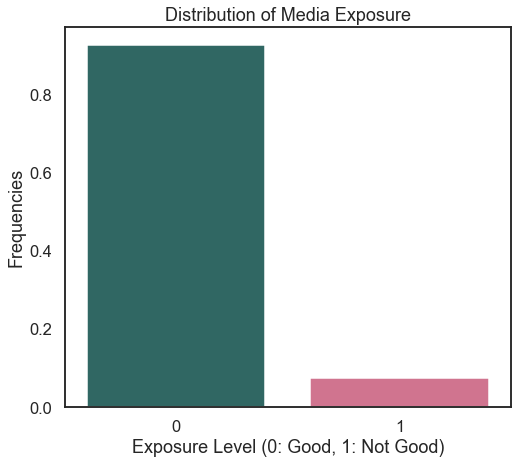

In [8]:
plt.figure(figsize=(8,7))
ax = sns.barplot(x=contra['media_exposure'].unique(),
                 y=contra.groupby('media_exposure').contraceptive.count() / contra.shape[0],
                 palette=['#27706B', '#DF6589', '#FFC3AF'])
ax.set(ylabel='Frequencies',
       xlabel='Exposure Level (0: Good, 1: Not Good)',
       title='Distribution of Media Exposure');

## Measures of center and spread

In [9]:
contra.mean()

wife_age              32.538357
wife_education         2.958588
husband_education      3.429735
num_child              3.261371
wife_religion          0.850645
wife_work              0.749491
husband_occupation     2.137814
standard_living        3.133741
media_exposure         0.073999
contraceptive          0.799050
dtype: float64

In [10]:
contra.std()

wife_age              8.227245
wife_education        1.014994
husband_education     0.816349
num_child             2.358549
wife_religion         0.356559
wife_work             0.433453
husband_occupation    0.864857
standard_living       0.976161
media_exposure        0.261858
contraceptive         0.783022
dtype: float64

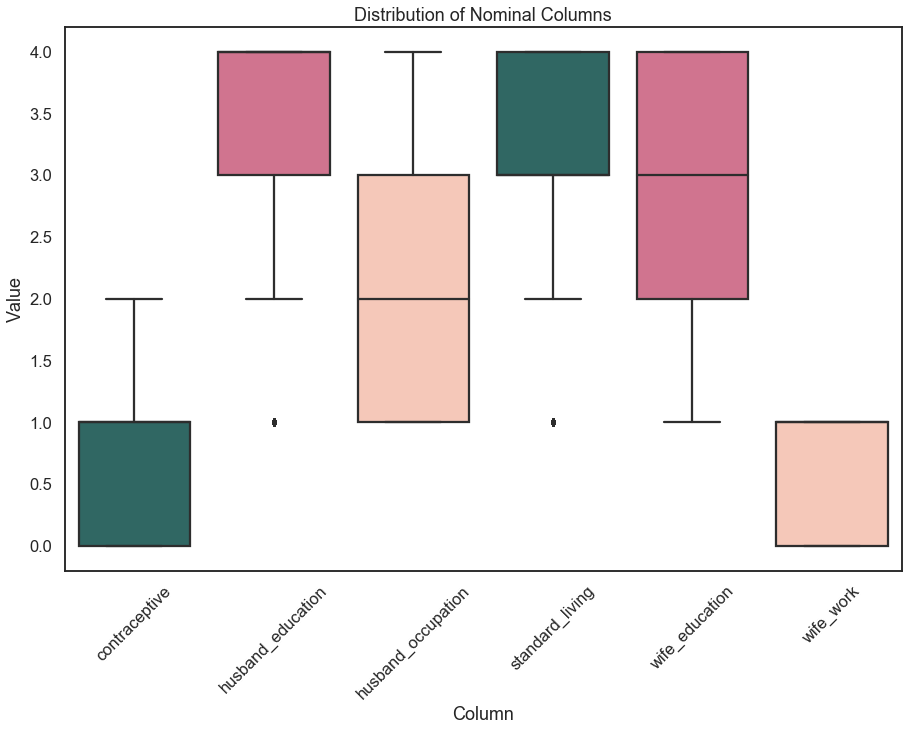

In [11]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='variable',
                 y='value',
                 data=pd.melt(contra[contra.columns.difference(['wife_age', 'num_child', 'media_exposure', 'wife_religion'])]),
                 palette=['#27706B', '#DF6589', '#FFC3AF'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(ylabel='Value', xlabel='Column', title='Distribution of Nominal Columns');
plt.show();

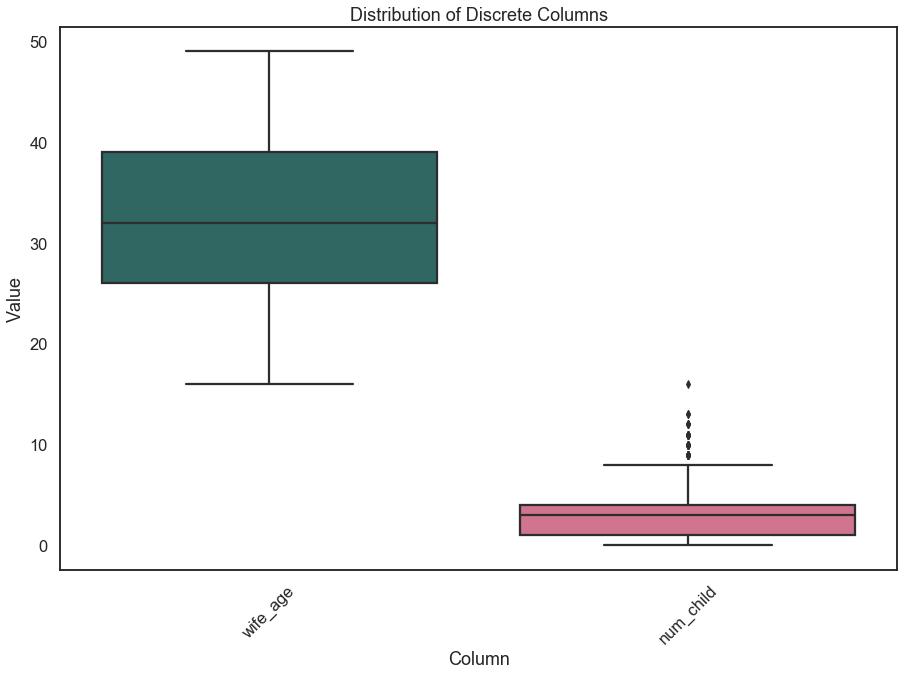

In [12]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='variable',
                 y='value',
                 data=pd.melt(contra[['wife_age', 'num_child']]),
                 palette=['#27706B', '#DF6589', '#FFC3AF'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(ylabel='Value',
       xlabel='Column',
       title='Distribution of Discrete Columns')
plt.show();

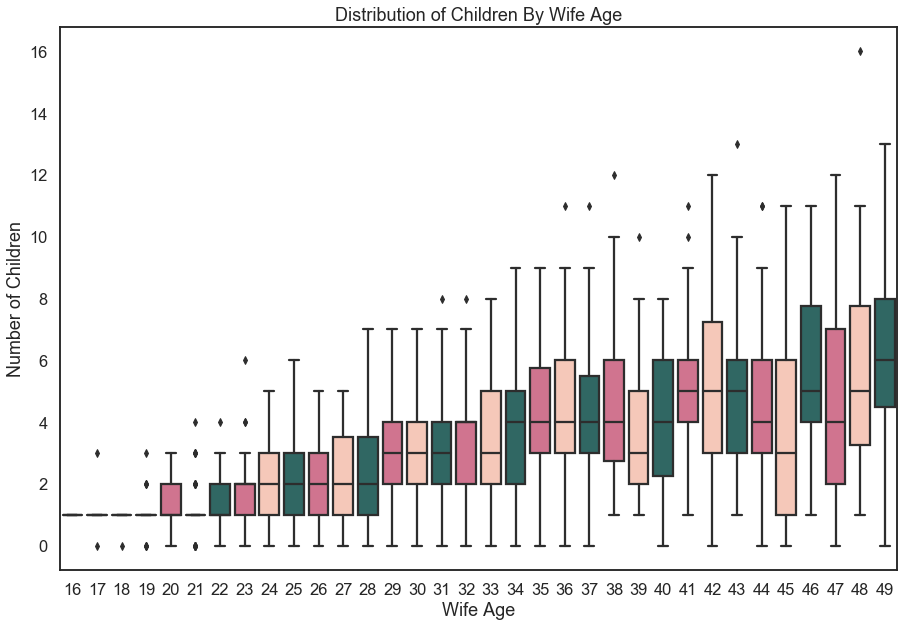

In [175]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='wife_age',
                 y='num_child',
                 data=contra,
                 palette=['#27706B', '#DF6589', '#FFC3AF'])

ax.set(ylabel='Number of Children',
       xlabel='Wife Age',
       title='Distribution of Children By Wife Age')

plt.savefig('../../4-visuals/box-children-per-age.png', dpi=400);

Next, I want to see what type of contraceptive methods are used by those in their 10's, 20's, 30's, and 40's. We need to wrangle the data a bit to do this.

In [224]:
labels = []
edges = np.arange(15, 51, 5)
for ix in range(len(edges)-1):
    labels.append(str(edges[ix]) + ' to ' + str(edges[ix+1]))
    
contra['age_bin'] = pd.cut(contra.wife_age, bins=edges, labels=labels)
age_contra = contra.groupby(['age_bin', 'contraceptive'], as_index=False).size().to_frame().reset_index()
age_contra = age_contra.rename({0:'count'}, axis=1)

num_in_bins = contra.groupby('age_bin', as_index=False).size()
age_contra['total'] = np.array(np.repeat(num_in_bins, len(contra['contraceptive'].unique())))

age_contra['freq'] = age_contra['count'] / age_contra['total']

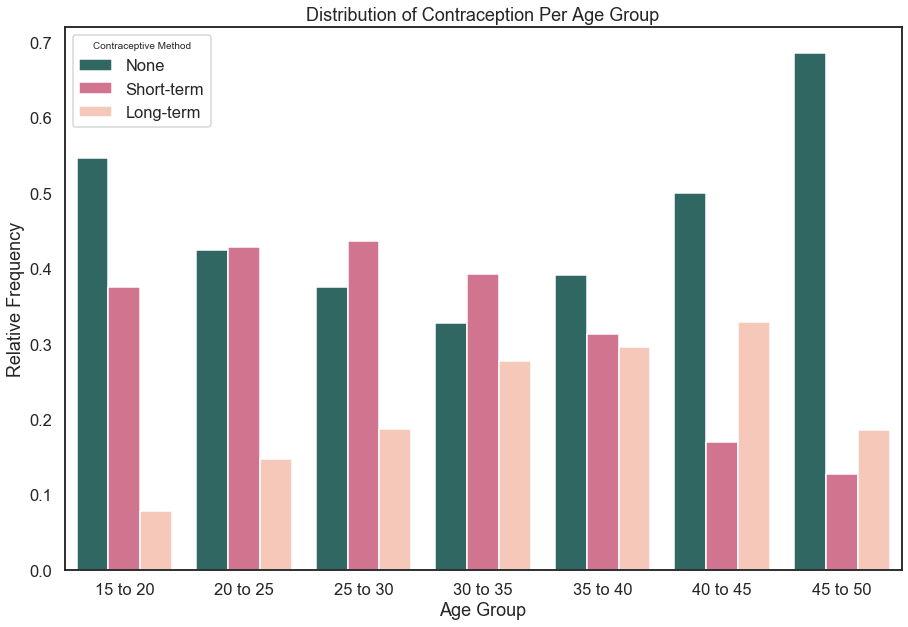

In [225]:
plt.figure(figsize=(15,10))
age_contra['contra_description'] = age_contra['contraceptive'].map({0:'None', 1:'Short-term', 2:'Long-term'})
ax = sns.barplot(x='age_bin',
            y='freq',
            hue='contra_description',
            data=age_contra,
            palette=['#27706B', '#DF6589', '#FFC3AF'])


ax.set(ylabel='Relative Frequency', xlabel='Age Group', title='Distribution of Contraception Per Age Group')
ax.legend(title='Contraceptive Method')
plt.savefig('../../4-visuals/bar-contra-per-age.png', dpi=400)
plt.show();

What is the distribution of women who work? **CAUTION**: The encoding is super stupid for the `wife_work` column.

In [208]:
# X WILL BE EDUCATION LEVEL
# Y WILL BE FREQUENCY OF WORKING
educ_work = contra.groupby(['wife_education', 'wife_work'], as_index=False).size().to_frame().reset_index()
educ_work = educ_work.rename({0:'count'}, axis=1)

num_in_bins = contra.groupby('wife_education', as_index=False).size()
educ_work['total'] = np.array(np.repeat(num_in_bins, len(contra['wife_work'].unique())))

educ_work['freq'] = educ_work['count'] / educ_work['total']

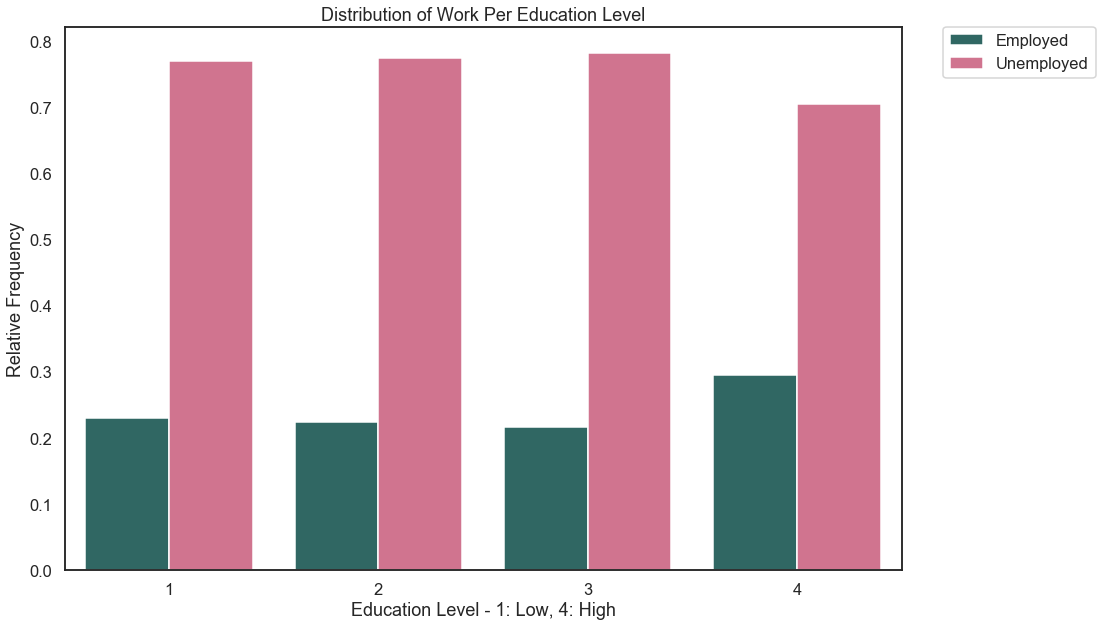

In [226]:
plt.figure(figsize=(15,10))
educ_work['work_description'] = educ_work['wife_work'].map({1:'Unemployed', 0:'Employed'})
ax = sns.barplot(x='wife_education',
            y='freq',
            hue='work_description',
            data=educ_work,
            palette=['#27706B', '#DF6589', '#FFC3AF'])


ax.set(ylabel='Relative Frequency', xlabel='Education Level - 1: Low, 4: High', title='Distribution of Work Per Education Level')
ax.legend(title='Wife Work')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../../4-visuals/bar-contra-per-age.png', dpi=400)
plt.show();

Next, I want to create a plot to see the relationship between a woman's work, her education level, and her choice of contraception method.

This requires something of <a href='https://stackoverflow.com/questions/47138271/how-to-create-a-stacked-bar-chart-for-my-dataframe-using-seaborn'>this sort</a>, but I want to keep the dodges as in the above plot.

In [179]:
educ_work_contra = contra.groupby(['wife_education', 'wife_work', 'contraceptive'], as_index=False).size().to_frame().reset_index()
educ_work_contra = educ_work_contra.rename({0:'count'}, axis=1)

In [180]:
educ_work_contra

,wife_education,wife_work,contraceptive,count
0,1,0,0,25
1,1,0,1,7
2,1,0,2,3
3,1,1,0,78
4,1,1,1,33
5,1,1,2,6
6,2,0,0,44
7,2,0,1,24
8,2,0,2,7
9,2,1,0,132
